# EXL Analytics 2020

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/exl-data/exl_data.csv
/kaggle/input/exl-eq-20/EXL_EQ_2020_Train_datasets.xlsb
/kaggle/input/exl-dict/exl_dict.xlsx
/kaggle/input/exl-test/exl_test.xlsx


## Importing Data & Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/kaggle/input/exl-data/exl_data.csv')
data_dict = pd.read_excel('/kaggle/input/exl-dict/exl_dict.xlsx')

# Exploratory Data Analysis

In [3]:
data.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,other,Inactive,Standard,Video/Internet/Voice,N,NaN,Single Housing,N,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,...,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,...,1,other,Active,Standard,Internet Only,NaN,NaN,Single Housing,N,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,movie_channel1,Never,Standard,Internet Only,N,NaN,Multi Housing,N,STB


In [4]:
data_dict

,Feature,Description
0,cust_id,Customer Account ID
1,var1,Account Tenure (Days for which customer has be...
2,var2,Number of temporary account disconnects in las...
3,var3,Wireless equipments owned by customer (value c...
4,var4,Number of times internet connect status = 1 (i...
5,var5,No. of Voice related tickets (in last one year)
6,var6,Index of social position based on neighborhood...
7,var7,Count of emails opened (in last 60 Days) where...
8,var8,Number of free On-demand video watched by cust...
9,var9,Median home value in the area of housing unit(...


In [5]:
# Basic details about data
print("Number of features: ", data.shape[1])
print("Number of customers: ", data.shape[0])

Number of features:  38
Number of customers:  300000


In [6]:
data.nunique()

cust_id                  300000
var1                      15684
var2                         32
var3                          5
var4                      25157
var5                         21
var6                         10
var7                        105
var8                        853
var9                     219914
var10                       200
var11                        12
var12                      8036
var13                      1894
var14                        13
var15                      3658
var16                         2
var21                       101
var22                    119593
var23                       100
var24                       149
var25                         2
var26                       841
var27                      2291
var28                      1488
var29                      1394
var30                         1
var31                        29
var32                         2
var33                         6
var34                         5
var35   

In [7]:
data['var30'].value_counts()

.    300000
Name: var30, dtype: int64

**Comment: Var30 needs to be deleted as it only contains dot**

In [8]:
# Percentage of missing values in each column
for col in data.columns:
    if sum(data[col].isnull()) != 0:
        print(col, ' :', sum(data[col].isnull())/data.shape[0]*100, '%  ', sum(data[col].isnull()))

var24  : 3.305333333333333 %   9916
var36  : 1.5443333333333333 %   4633
var37  : 6.480666666666666 %   19442
var38  : 61.717333333333336 %   185152
var39  : 0.007333333333333333 %   22


**Comment: **
- Should delete var30 (contains only single value)
- var38 contains 61% missing values



In [9]:
# Deciding Categorical & Numerical features
categorical_features = ['var16', 'var25', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var39', 'var40', 'self_service_platform']

numerical_features = []
for col in data.columns:
    if col not in categorical_features:
        numerical_features.append(col)
        
print("Numerical features: ", numerical_features)
print("\nCategorical Features: ", categorical_features)

Numerical features:  ['cust_id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var21', 'var22', 'var23', 'var24', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var38']

Categorical Features:  ['var16', 'var25', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var39', 'var40', 'self_service_platform']


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 38 columns):
cust_id                  300000 non-null int64
var1                     300000 non-null int64
var2                     300000 non-null int64
var3                     300000 non-null int64
var4                     300000 non-null int64
var5                     300000 non-null int64
var6                     300000 non-null int64
var7                     300000 non-null int64
var8                     300000 non-null int64
var9                     300000 non-null int64
var10                    300000 non-null int64
var11                    300000 non-null int64
var12                    300000 non-null int64
var13                    300000 non-null int64
var14                    300000 non-null int64
var15                    300000 non-null int64
var16                    300000 non-null int64
var21                    300000 non-null int64
var22                    300000 non-null in

## Exploring Numerical features

In [11]:
# Describing features
data[numerical_features].describe()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var15,var21,var22,var23,var24,var26,var27,var28,var29,var31
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,...,300000.000000,300000.000000,300000.000000,300000.000000,290084.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250000.500000,2987.161307,0.567820,0.404513,4893.003973,0.513093,5.039663,2.242540,25.506757,3.205377e+05,...,241.379920,21.047837,91421.038147,43.971097,10.366787,18.258913,210.077323,16.598460,15.211177,0.293537
std,86602.684716,3349.886526,3.352299,0.632648,10742.376343,1.969464,2.933883,8.078042,81.535553,2.648355e+05,...,419.362044,19.665769,47805.244109,28.366845,19.296733,73.270510,1024.015097,114.512098,100.515091,1.699881
min,100001.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175000.750000,544.000000,0.000000,0.000000,688.000000,0.000000,2.000000,0.000000,0.000000,1.628160e+05,...,63.000000,8.000000,58668.750000,23.000000,0.000000,2.000000,79.000000,0.000000,0.000000,0.000000
50%,250000.500000,1862.000000,0.000000,0.000000,2161.000000,0.000000,5.000000,0.000000,3.000000,2.620815e+05,...,141.000000,15.000000,85514.000000,43.000000,0.000000,5.000000,136.000000,0.000000,0.000000,0.000000
75%,325000.250000,3616.000000,0.000000,1.000000,5302.000000,0.000000,8.000000,0.000000,20.000000,3.496402e+05,...,225.000000,34.000000,105833.250000,69.000000,16.000000,10.000000,181.000000,7.000000,7.000000,0.000000
max,400000.000000,17337.000000,31.000000,4.000000,103192.000000,20.000000,9.000000,104.000000,1783.000000,1.950000e+06,...,3806.000000,100.000000,343515.000000,99.000000,148.000000,845.000000,21814.000000,2338.000000,2023.000000,28.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f063f72c6a0>,
      dtype=object)

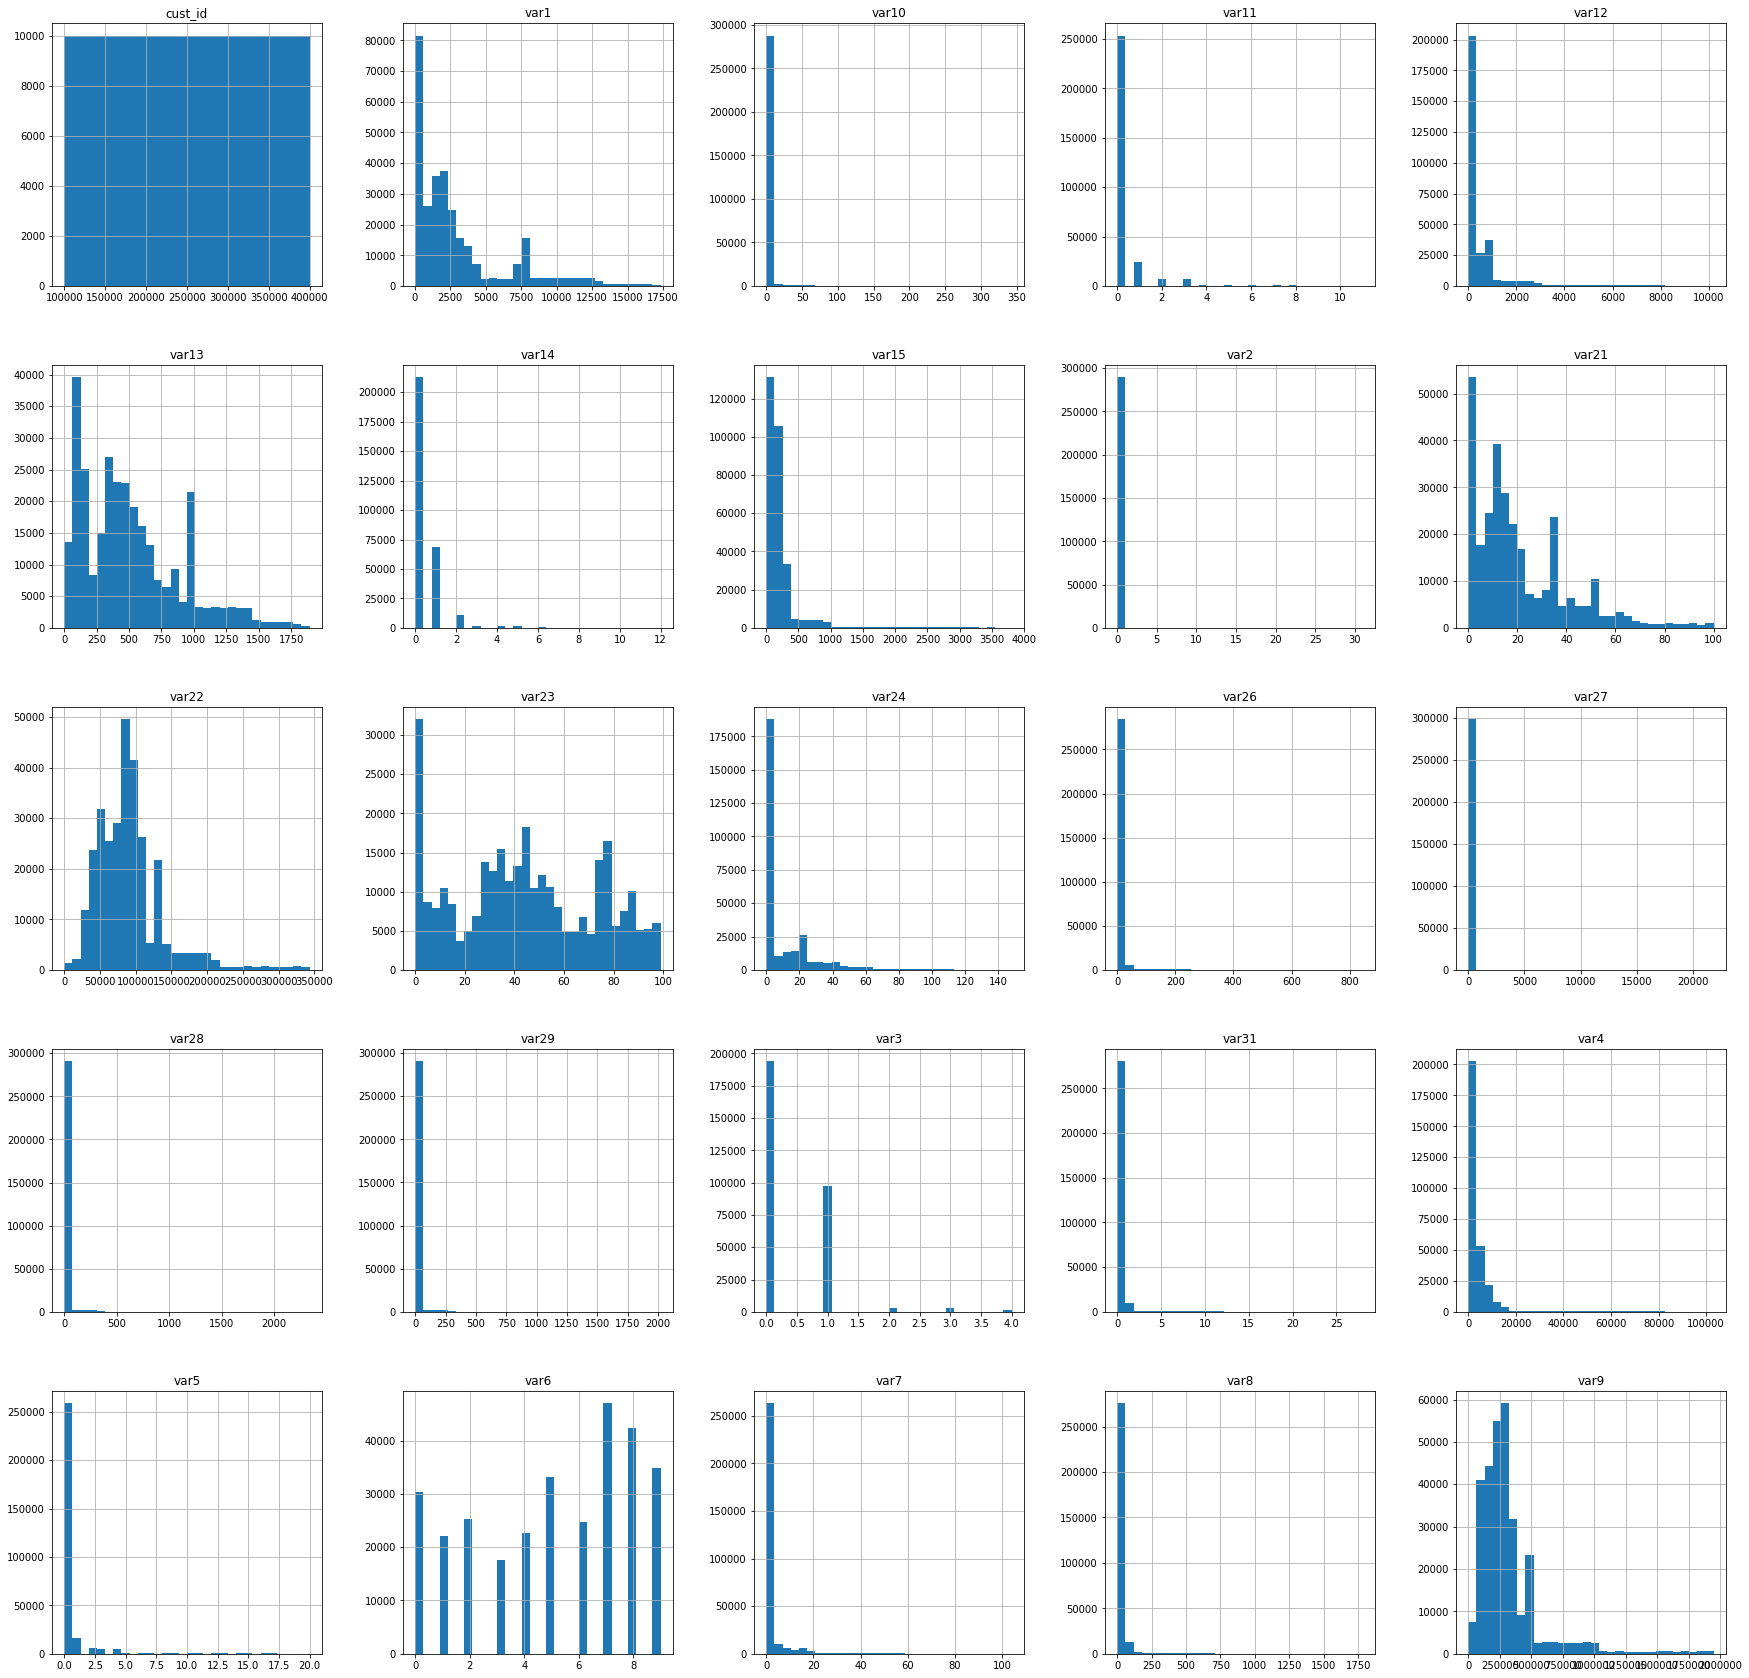

In [12]:
# Visualizing Numerical Features
data[numerical_features].hist(bins=30, figsize=(30,30))

Comments:
- There are many zeros - which suggest that it has probably been used as a fill value.
- var 9 and var22 have similar distributions (Median home value in the area of housing unit & Median family income in the geographical area)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f063f2c0390>,
      dtype=object)

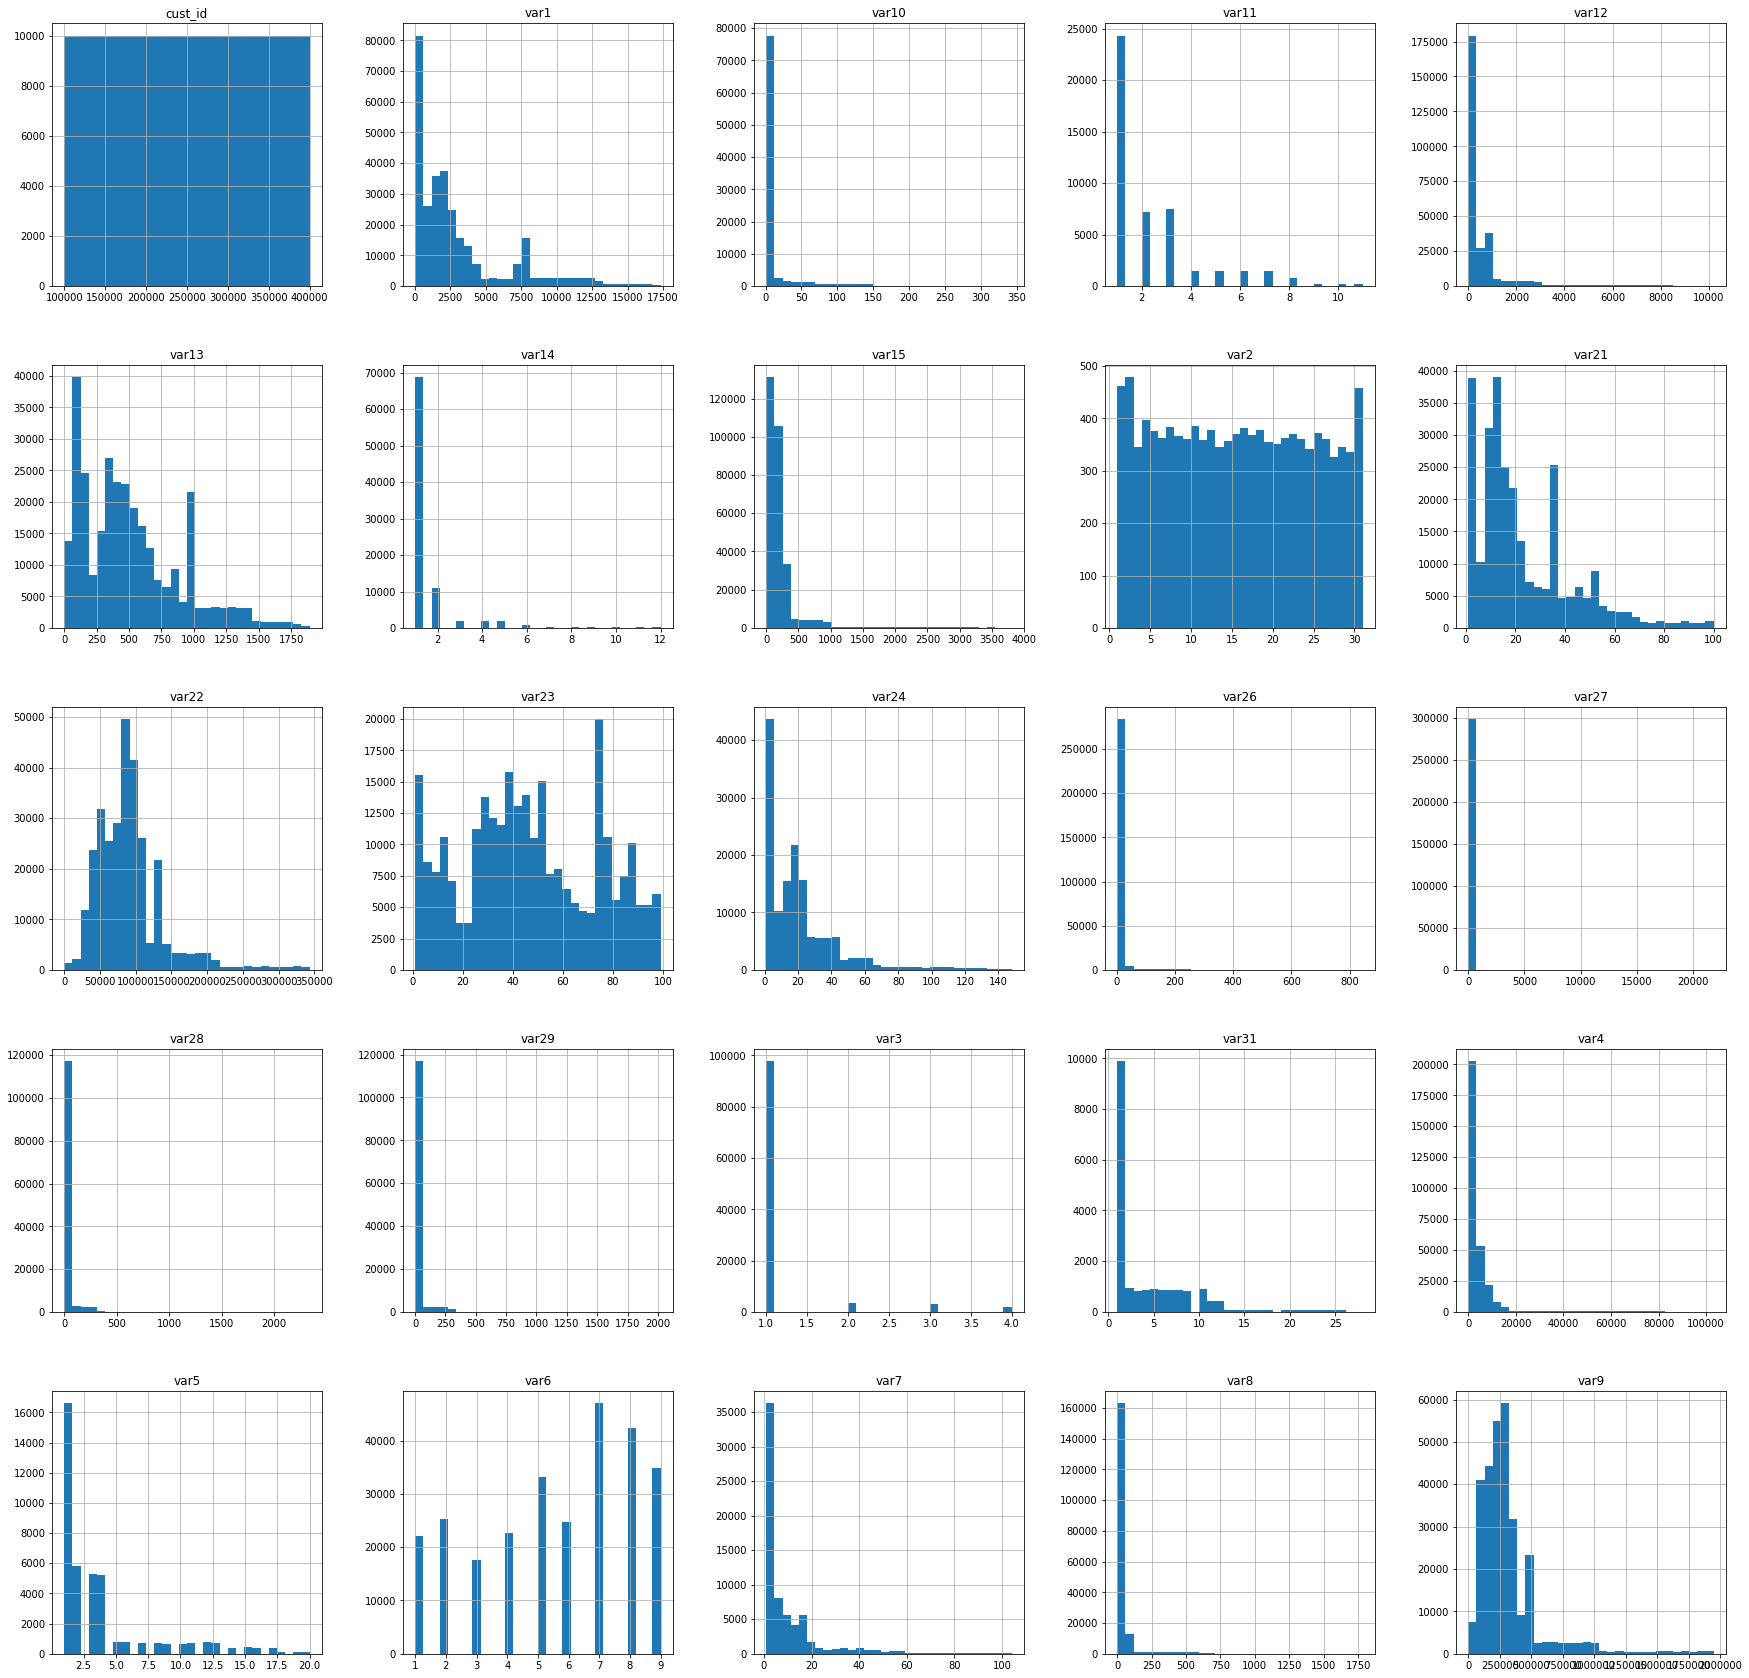

In [13]:
# Trying to remove zeros
new_data = data.replace({0:np.nan})
new_data[numerical_features].hist(bins=30, figsize=(30,30))

**Comment: At first I thought that 0 was filled as a NaN value. But even after removing zeros, it seems the data is still highly left skew.**

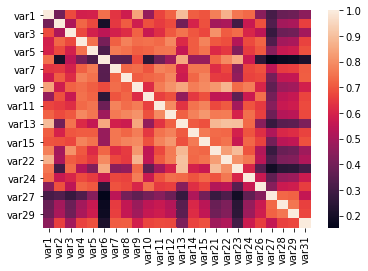

In [14]:
# Correlations in numerical features
sns.heatmap(data[numerical_features[1:]].corr())

In [15]:
data[numerical_features[1:]].corr()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var15,var21,var22,var23,var24,var26,var27,var28,var29,var31
var1,1.000000,0.401759,0.678996,0.590253,0.596808,0.742463,0.640905,0.581024,0.844108,0.468909,...,0.695144,0.773496,0.873550,0.755098,0.734095,0.443274,0.308473,0.380083,0.389483,0.451564
var2,0.401759,1.000000,0.515538,0.726372,0.677349,0.205752,0.647441,0.710842,0.583222,0.689650,...,0.691252,0.493754,0.510531,0.297943,0.569980,0.690460,0.333449,0.495949,0.507427,0.660591
var3,0.678996,0.515538,1.000000,0.676327,0.592910,0.546806,0.595102,0.623665,0.721031,0.567273,...,0.674400,0.810003,0.711249,0.736067,0.608576,0.546501,0.276430,0.386051,0.394746,0.495722
var4,0.590253,0.726372,0.676327,1.000000,0.746943,0.408449,0.715095,0.776457,0.738374,0.745532,...,0.778267,0.704473,0.686348,0.530254,0.679412,0.724322,0.328825,0.493423,0.507107,0.665463
var5,0.596808,0.677349,0.592910,0.746943,1.000000,0.323301,0.762095,0.745299,0.712867,0.721655,...,0.750945,0.618418,0.646294,0.427432,0.652639,0.701974,0.437020,0.568896,0.579783,0.688515
var6,0.742463,0.205752,0.546806,0.408449,0.323301,1.000000,0.349372,0.345780,0.681000,0.252634,...,0.470612,0.725953,0.793602,0.856205,0.573872,0.253858,0.151541,0.176897,0.183566,0.216215
var7,0.640905,0.647441,0.595102,0.715095,0.762095,0.349372,1.000000,0.729267,0.738508,0.697140,...,0.755309,0.623228,0.674009,0.445143,0.673706,0.694260,0.542633,0.654405,0.660232,0.710740
var8,0.581024,0.710842,0.623665,0.776457,0.745299,0.345780,0.729267,1.000000,0.708908,0.725334,...,0.783780,0.655270,0.649019,0.463144,0.666684,0.675223,0.404645,0.557073,0.562454,0.712450
var9,0.844108,0.583222,0.721031,0.738374,0.712867,0.681000,0.738508,0.708908,1.000000,0.618957,...,0.793185,0.818195,0.879001,0.735390,0.770322,0.606325,0.363022,0.476949,0.489932,0.591713
var10,0.468909,0.689650,0.567273,0.745532,0.721655,0.252634,0.697140,0.725334,0.618957,1.000000,...,0.690659,0.550219,0.554544,0.359200,0.575021,0.744255,0.403986,0.547673,0.565105,0.669241


## There are highly correlated features in the data
Should be addressed later on.

## Exploring Categorical Features

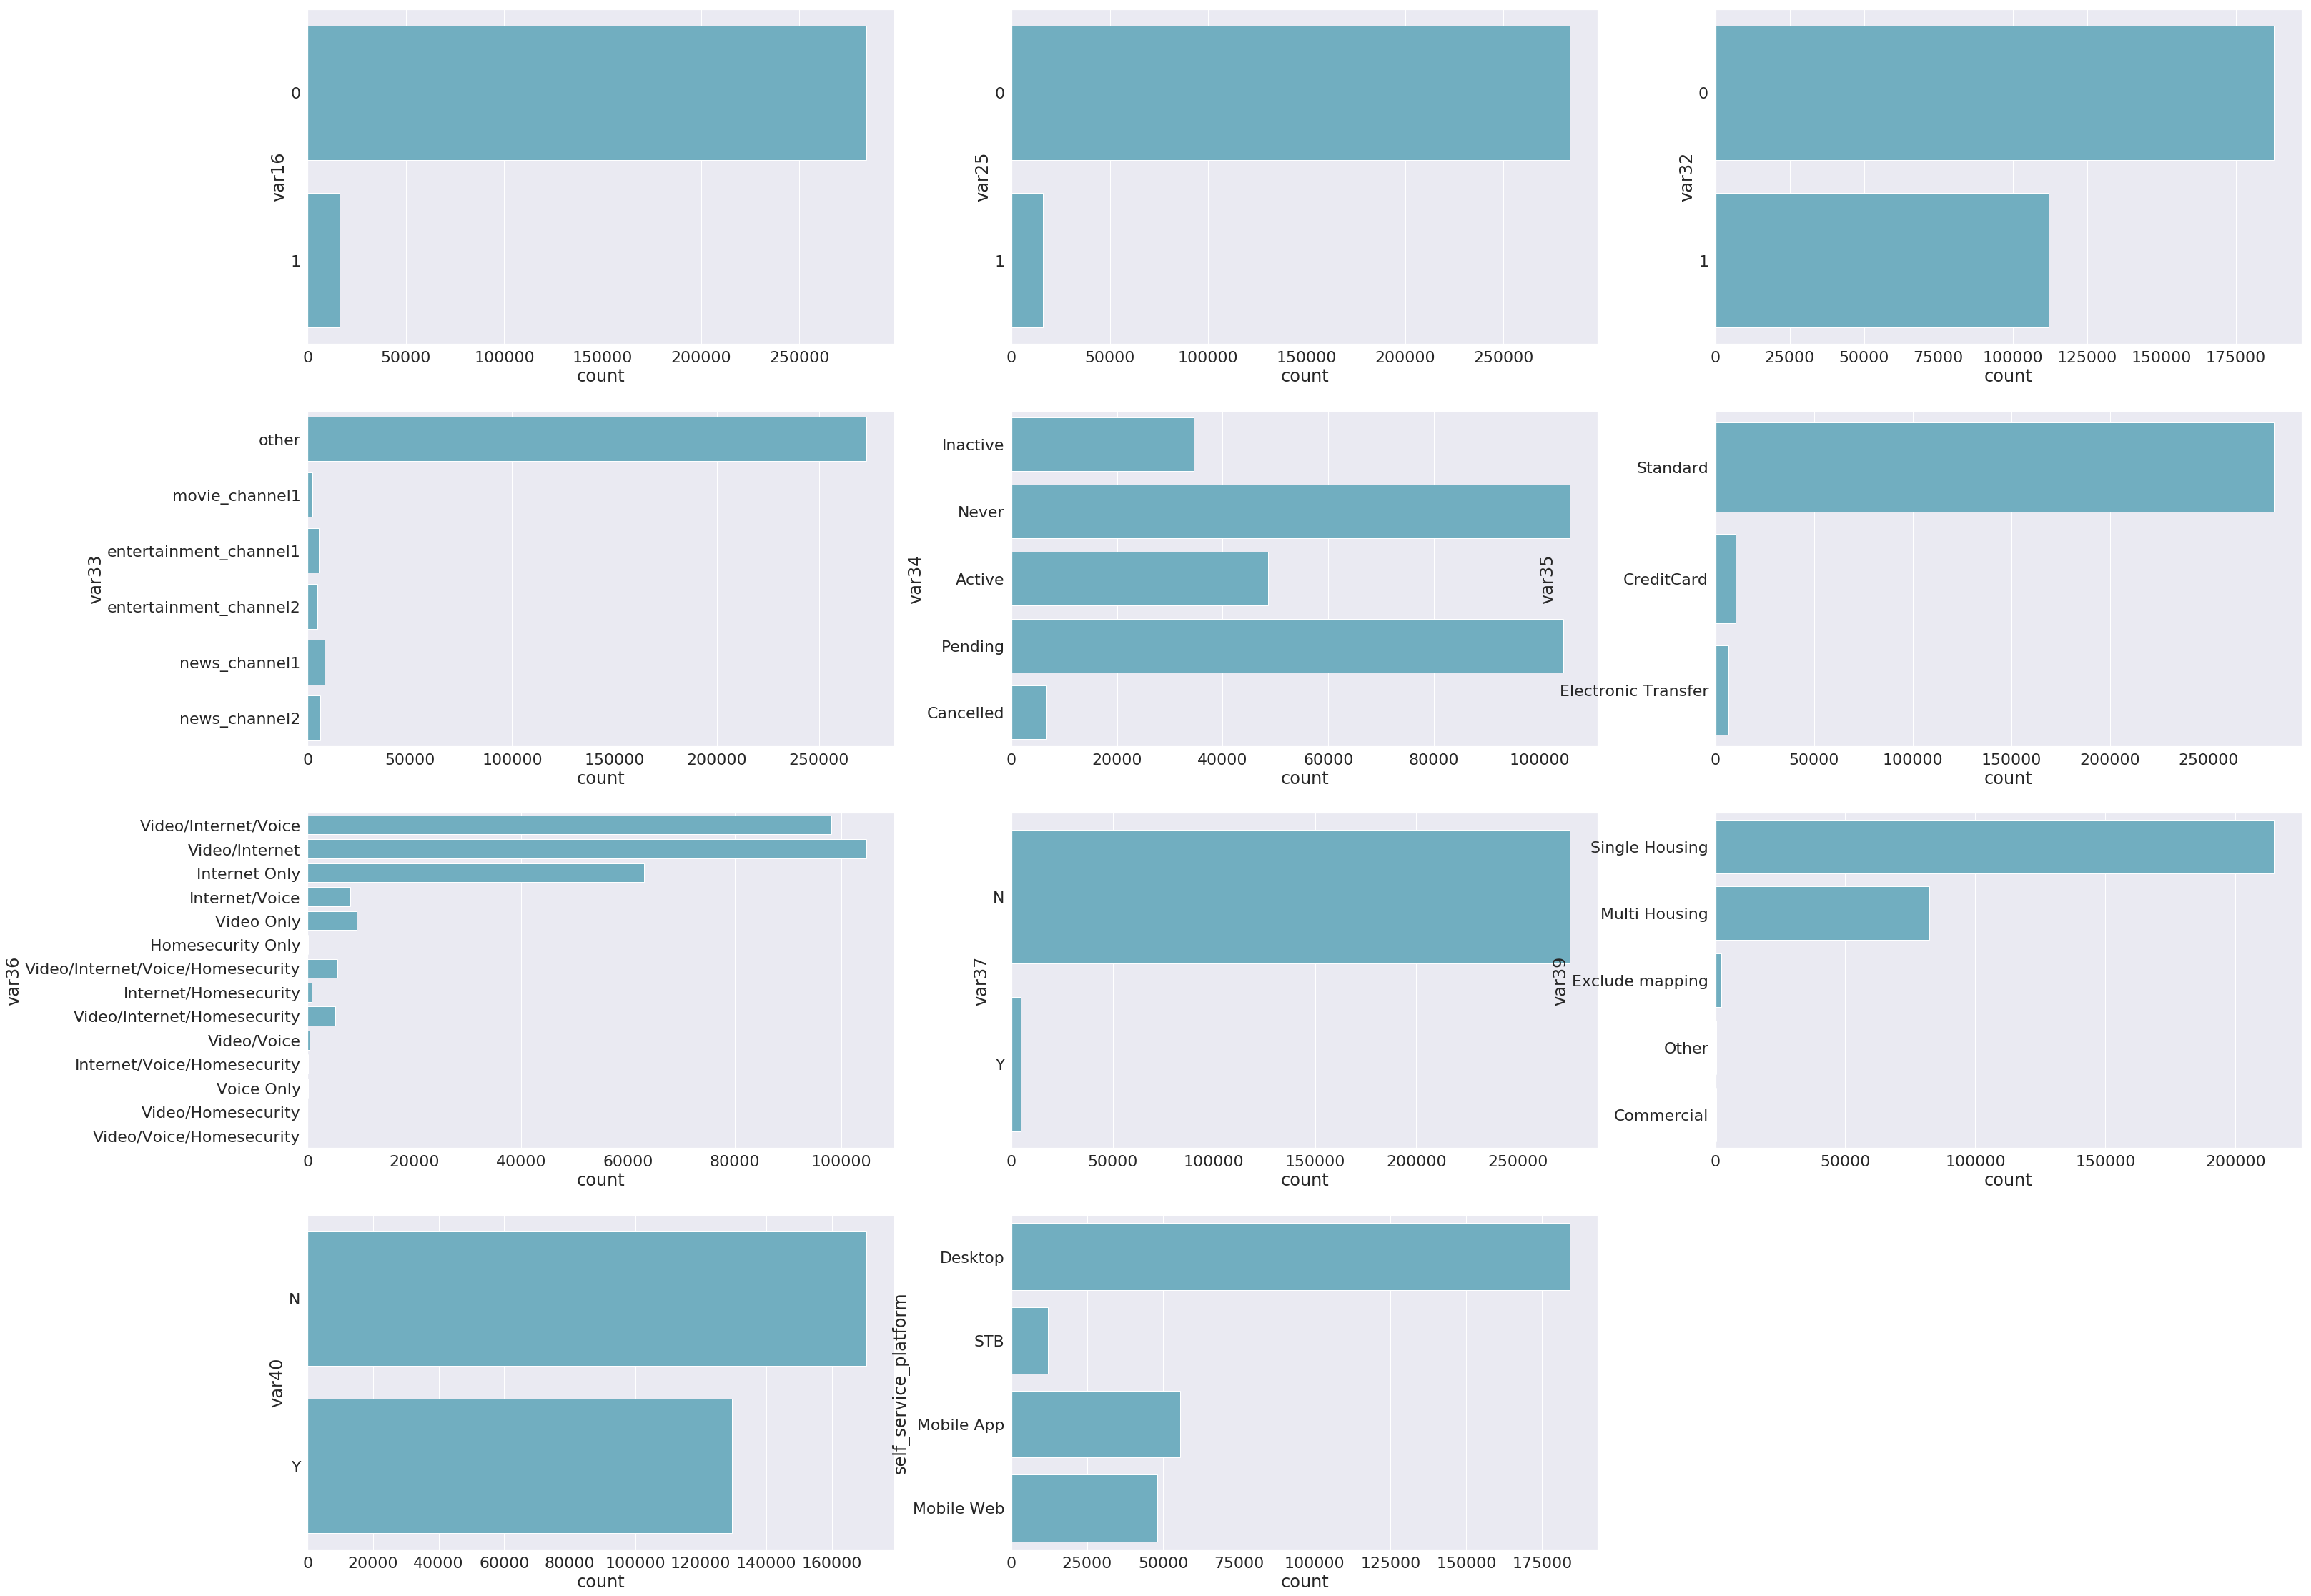

In [16]:
# Categorical features Visualization
sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features)+1):
    ax = fig.add_subplot(5, 3, i)
    sns.countplot(y=categorical_features[i-1], data=data, color="c")

In [17]:
data['var36'].value_counts()

Video/Internet                       104654
Video/Internet/Voice                  98173
Internet Only                         63010
Video Only                             9195
Internet/Voice                         8072
Video/Internet/Voice/Homesecurity      5603
Video/Internet/Homesecurity            5153
Internet/Homesecurity                   714
Video/Voice                             359
Homesecurity Only                       160
Internet/Voice/Homesecurity             154
Voice Only                              107
Video/Homesecurity                       10
Video/Voice/Homesecurity                  3
Name: var36, dtype: int64

# Cleaning Data

In [18]:
data.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,other,Inactive,Standard,Video/Internet/Voice,N,NaN,Single Housing,N,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,...,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,...,1,other,Active,Standard,Internet Only,NaN,NaN,Single Housing,N,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,movie_channel1,Never,Standard,Internet Only,N,NaN,Multi Housing,N,STB


In [19]:
target = data['self_service_platform'].replace({'Desktop':1, 'Mobile App':2, 'Mobile Web':3, 'STB':4})
data.drop('self_service_platform', axis=1, inplace=True)

In [20]:
categorical_features.remove('self_service_platform')
numerical_features.remove('cust_id')

In [21]:
data.columns

Index(['cust_id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27',
       'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35',
       'var36', 'var37', 'var38', 'var39', 'var40'],
      dtype='object')

## New Features
- var5/var26 (NO of Voice related tickets/Total number of tickets)
- var7/var24 (No. of emails opened/No. of emails sent)
- var10/var28 (No. of calls made to IVR/ Total no. of calls)

## Some Insights from Data Understanding

**Locality Features**
- var9 and var22 are related (median home value and family income in the region)
- var 6 shows information about social index of locality
- var39 shows the dwelling type

**Issues Raised Features**
- var10	No. of IVR calls on Billing-related issues (in last one year)
- var15	Total tickets raised related to video product
- var29	No. of the unique agents that handled calls for the customer (in last 365 Days)
- var31	No. of sales calls made by customer to buy a product (in last 30 days)
- var38	Team the billing tickets that IVR call redirects to (Eg: Connected to agent, self-service, other)

**Email related**
- var7	Count of emails opened (in last 60 Days) where Scherp has been the internet provider
- var24	Count of emails sent (in last 60 Days) where Scherp has been the internet provider
- var30	No. of direct mails sent to account holder (in last 9 months)
- var37	Indicator if a customer prefers direct mail or not


**Device owned**
- var3	Wireless equipments owned by customer (value can vary between 0-4, Eg:modem, router etc.)
- var11	No. of digital equipments owned by customer(Eg: mobile, tablet etc.)
- var14	No of digital video recorders (DVR-HD) owned by customer
- var36	Mix of Scherp products that the customer has subscribed to


**Viewing profile**
- var8	Number of free On-demand video watched by customer
- var12	Total duration (in mins) News_channel1 was watched
- var16	Indicator if customer subscribed for Spanish video(TV channels) package
- var33	Top viewed network/channel (on Video product)


# Base Model

In [22]:
# Treating var36
# Removing Only in string (i.e seperate the variables on space)
new_var36 = data['var36'].str.split(pat=' ', expand=True)[0]
# Seperating these variables as one hot encoding by seperating at '/'
new_var36 = new_var36.str.get_dummies(sep='/').add_prefix('var36_')

new_data = pd.concat([new_var36, data.drop('var36', axis=1)], axis=1).fillna(0)

In [23]:
new_data.head()

,var36_Homesecurity,var36_Internet,var36_Video,var36_Voice,cust_id,var1,var2,var3,var4,var5,...,var30,var31,var32,var33,var34,var35,var37,var38,var39,var40
0,0,1,1,1,100001,2667,0,0,1768,0,...,.,0,0,other,Inactive,Standard,N,0,Single Housing,N
1,0,1,1,0,100002,435,0,0,515,0,...,.,0,0,other,Never,Standard,N,0,Single Housing,N
2,0,1,1,1,100003,1520,0,0,2280,0,...,.,0,0,other,Inactive,Standard,N,Agent,Single Housing,Y
3,0,1,0,0,100004,4393,0,1,5731,0,...,.,0,1,other,Active,Standard,0,0,Single Housing,N
4,0,1,0,0,100005,3587,0,0,2493,0,...,.,0,0,movie_channel1,Never,Standard,N,0,Multi Housing,N


In [24]:
new_data.columns

Index(['var36_Homesecurity', 'var36_Internet', 'var36_Video', 'var36_Voice',
       'cust_id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27',
       'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35',
       'var37', 'var38', 'var39', 'var40'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15)

In [27]:
X_train.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
202883,302884,1326,0,1,2527,0,5,0,0,237835,...,0,0,other,Never,Standard,Video/Internet/Voice,N,NaN,Single Housing,Y
6227,106228,4473,10,1,86773,1,9,54,280,1293122,...,9,1,other,Never,Standard,Video/Internet,N,NaN,Multi Housing,N
118900,218901,2767,0,0,1532,0,6,0,0,235916,...,0,0,other,Never,Standard,Internet Only,N,Other,Single Housing,Y
265361,365362,50,0,0,18,0,0,0,0,18621,...,0,0,other,Never,Standard,Video/Internet/Voice,N,Agent,Single Housing,N
290066,390067,12720,30,2,89847,11,8,55,338,712947,...,0,1,other,Pending,Standard,Video/Internet/Voice,NaN,Other,Single Housing,Y


In [28]:
X_test.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
201176,301177,3143,0,0,2706,0,7,0,7,334219,...,0,0,other,Never,Standard,Video/Internet/Voice,N,Agent,Single Housing,N
136604,236605,8236,0,1,14437,1,9,13,68,841481,...,1,1,other,Never,Standard,Video/Internet/Voice,N,NaN,Single Housing,N
36086,136087,630,0,0,1047,0,2,0,2,162818,...,0,1,other,Pending,Standard,Video/Internet,N,NaN,Single Housing,N
275080,375081,1436,0,0,3228,0,7,0,4,343320,...,0,1,other,Active,CreditCard,Video/Internet,N,NaN,Single Housing,Y
247552,347553,2815,0,0,2145,0,5,0,4,275299,...,0,0,other,Never,Standard,Internet Only,N,NaN,Single Housing,Y


In [29]:
new_data.columns

Index(['var36_Homesecurity', 'var36_Internet', 'var36_Video', 'var36_Voice',
       'cust_id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27',
       'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35',
       'var37', 'var38', 'var39', 'var40'],
      dtype='object')

## Feature Engineering

In [30]:
# Categorical Tranformations
def new_transform(X):
    
    categorical_features = ['var16','var25','var32', 'var33', 'var34', 'var35', 'var38', 'var39']
    
    # Dropping var30 and cust_id
    X = X.drop(['var30', 'cust_id'], axis=1)
    
    X[['var37', 'var40']] = X[['var37', 'var40']].replace({"Y":1, "N":0})
    
    # Treating var36
    # Removing Only in string (i.e seperate the variables on space)
    new_var36 = X['var36'].str.split(pat=' ', expand=True)[0]
    # Seperating these variables as one hot encoding by seperating at '/'
    new_var36 = new_var36.str.get_dummies(sep='/').add_prefix('var36_')

    X = pd.concat([new_var36, X.drop('var36', axis=1)], axis=1)
    X.fillna(0)
    X = pd.concat([pd.get_dummies(X[categorical_features]), X.drop(categorical_features, axis=1)], axis=1)
    
    
    # Feature Generation
    X['ratio_tickets'] = X['var5']/X['var26']
    X['ratio_emails'] = X['var7']/X['var24']
    X['ratio_calls'] = X['var10']/X['var28']
    X['ratio_video'] = X['var15']/X['var26']
    X['recurring_ratio'] = X['var21']/X['var27']
    X['credit_amount'] = X['var23']*X['var27']
    X['credit_recurring'] = X['var23']*X['var21']
    
    # Handling division by zeros
    X.loc[~np.isfinite(X['ratio_calls']), 'ratio_calls'] = 0
    X.loc[~np.isfinite(X['ratio_emails']), 'ratio_emails'] = 0
    X.loc[~np.isfinite(X['ratio_tickets']), 'ratio_tickets'] = 0
    X.loc[~np.isfinite(X['ratio_video']), 'ratio_video'] = 0
    X.loc[~np.isfinite(X['recurring_ratio']), 'recurring_ratio'] = 0
    X.loc[~np.isfinite(X['credit_amount']), 'credit_amount'] = 0
    X.loc[~np.isfinite(X['credit_recurring']), 'credit_recurring'] = 0
    
    
    # Some features on emails
    # The cust prefers email or not and the number of mails recieved by them
    X['email_likes'] = X['var37'].where(X['var37']==1, -1) # If he likes, +1 else -1
    X['email_likes_opened'] = X['email_likes']*X['var7']
    X['email_likes_sent'] = X['email_likes']*X['var24']
    
    return X.fillna(0)

In [31]:
new_X = new_transform(data)

In [32]:
new_X.head()

,var16,var25,var32,var33_entertainment_channel1,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,var34_Active,...,ratio_tickets,ratio_emails,ratio_calls,ratio_video,recurring_ratio,credit_amount,credit_recurring,email_likes,email_likes_opened,email_likes_sent
0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,40.250000,0.058824,4131,243,-1.0,-0.0,-0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,34.000000,0.054054,296,16,-1.0,-0.0,-0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,22.400000,0.075188,3458,260,-1.0,-0.0,-0.0
3,0,0,1,0,0,0,0,0,1,1,...,0.0,0.05,0.125,24.181818,0.158654,14768,2343,-1.0,-1.0,-20.0
4,0,0,0,0,0,1,0,0,0,0,...,0.0,0.00,0.000,27.666667,0.096774,7130,690,-1.0,-0.0,-33.0


In [33]:
print((new_X!='other').isnull().any().sum())

0


/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [34]:
new_transform(data).columns

Index(['var16', 'var25', 'var32', 'var33_entertainment_channel1',
       'var33_entertainment_channel2', 'var33_movie_channel1',
       'var33_news_channel1', 'var33_news_channel2', 'var33_other',
       'var34_Active', 'var34_Cancelled', 'var34_Inactive', 'var34_Never',
       'var34_Pending', 'var35_CreditCard', 'var35_Electronic Transfer',
       'var35_Standard', 'var38_Agent', 'var38_Other', 'var38_Self Service',
       'var39_Commercial', 'var39_Exclude mapping', 'var39_Multi Housing',
       'var39_Other', 'var39_Single Housing', 'var36_Homesecurity',
       'var36_Internet', 'var36_Video', 'var36_Voice', 'var1', 'var2', 'var3',
       'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11',
       'var12', 'var13', 'var14', 'var15', 'var21', 'var22', 'var23', 'var24',
       'var26', 'var27', 'var28', 'var29', 'var31', 'var37', 'var40',
       'ratio_tickets', 'ratio_emails', 'ratio_calls', 'ratio_video',
       'recurring_ratio', 'credit_amount', 'credit_recurring', '

In [35]:
new_transform(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 65 columns):
var16                           300000 non-null int64
var25                           300000 non-null int64
var32                           300000 non-null int64
var33_entertainment_channel1    300000 non-null uint8
var33_entertainment_channel2    300000 non-null uint8
var33_movie_channel1            300000 non-null uint8
var33_news_channel1             300000 non-null uint8
var33_news_channel2             300000 non-null uint8
var33_other                     300000 non-null uint8
var34_Active                    300000 non-null uint8
var34_Cancelled                 300000 non-null uint8
var34_Inactive                  300000 non-null uint8
var34_Never                     300000 non-null uint8
var34_Pending                   300000 non-null uint8
var35_CreditCard                300000 non-null uint8
var35_Electronic Transfer       300000 non-null uint8
var35_Standard           

In [36]:
# Adding missing values and one hot encoder pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

categorical_features = ['var25','var32', 'var33', 'var34', 'var35', 'var38', 'var39']

my_feature_transformer = FunctionTransformer(new_transform)
imp = SimpleImputer(strategy="most_frequent", add_indicator=True)
enc = OneHotEncoder(handle_unknown='ignore')
from category_encoders.target_encoder import TargetEncoder
target_enc = TargetEncoder()


col_transformer = Pipeline([("my_trans", my_feature_transformer), ("imp", imp)])

In [37]:
# Random Under Sampling
sampling_dict = {}
for i, target_count in enumerate(y_train.value_counts().values):
    if i==0:
        sampling_dict[i+1] = int(target_count*0.45)
    else:
        sampling_dict[i+1] = int(target_count)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_dict, random_state=42)
sampling_dict

Using TensorFlow backend.


{1: 70433, 2: 47246, 3: 40913, 4: 10322}

In [38]:
y_train.shape

(255000,)

In [39]:
X_train.shape, X_test.shape

((255000, 37), (45000, 37))

In [40]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier((10,), max_iter=1000)

#selector = RFE(estimator=LogisticRegression(),20, step=1)


from sklearn import preprocessing
from sklearn.feature_extraction import FeatureHasher


rf = RandomForestClassifier(random_state=2, min_samples_split=17)
rf_pipeline = Pipeline([('preprocess', my_feature_transformer), ('model', rf)])

pd.DataFrame(PowerTransformer().fit_transform(X=new_transform(data))).hist(bins=30, figsize=(30,30))

In [41]:
X_res, y_res = rus.fit_resample(X_train, y_train)
rf_pipeline.fit(X_res, y_res)

print("Training score: ", rf_pipeline.score(X_train, y_train))
print("Testing score: ", rf_pipeline.score(X_test, y_test))
print(confusion_matrix(y_test, rf_pipeline.predict(X_test)))

Training score:  0.7603215686274509
Testing score:  0.7478222222222223
[[24086  1870  1495   224]
 [ 2751  4869   634    95]
 [ 2382   667  4019    82]
 [  760   206   182   678]]


In [42]:
# Training the same with whole dataset

rf_pipeline.score(data, target)

0.7584466666666667

## Checking final scores

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(X=data, y=target, estimator=rf_pipeline, cv=4)

print(scores.mean())

0.74646


In [44]:
scores

array([0.74586667, 0.74688   , 0.74756   , 0.74553333])

In [45]:
test_data = pd.read_excel('/kaggle/input/exl-test/exl_test.xlsx')

#Basic cleaning of test
# Treating var36
# Removing Only in string (i.e seperate the variables on space)
new_var36_test = test_data['var36'].str.split(pat=' ', expand=True)[0]
# Seperating these variables as one hot encoding by seperating at '/'
new_var36_test = new_var36_test.str.get_dummies(sep='/').add_prefix('var36_')

new_data_test = pd.concat([new_var36_test, test_data.drop('var36', axis=1)], axis=1).fillna(0)
new_data_test[['var37', 'var40']] = new_data_test[['var37', 'var40']].replace(["Y", "N"], [1, 0])
categorical_features = ['var16','var25','var32', 'var33', 'var34', 'var35', 'var38', 'var39']
new_df_test =  pd.concat([new_data_test.drop(categorical_features, axis=1), pd.get_dummies(new_data_test[categorical_features])], axis = 1)

In [46]:
test_data.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
0,400001,2871,0,0,1925,0,7,0,1,238388,...,0,0,other,Pending,Standard,Video/Internet/Voice,N,NaN,Single Housing,N
1,400002,562,0,0,197,0,3,0,0,136782,...,0,0,other,Inactive,Standard,Internet Only,N,Other,Single Housing,N
2,400003,4350,0,1,5664,0,8,1,25,336602,...,0,1,other,Inactive,Standard,Video/Internet,N,NaN,Single Housing,N
3,400004,7580,0,1,6093,0,8,4,31,501694,...,0,1,other,Active,Standard,Internet Only,N,NaN,Single Housing,N
4,400005,58,0,0,53,0,0,0,0,87465,...,0,0,other,Active,Standard,Video/Internet,N,NaN,Single Housing,N


In [47]:
test_data.shape

(300000, 37)

In [48]:
new_transform(test_data).head()

,var16,var25,var32,var33_entertainment_channel1,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,var34_Active,...,ratio_tickets,ratio_emails,ratio_calls,ratio_video,recurring_ratio,credit_amount,credit_recurring,email_likes,email_likes_opened,email_likes_sent
0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.000,0.000000,38.333333,0.107438,3993,429,-1.0,-0.0,-0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.000,0.000000,61.000000,0.016393,976,16,-1.0,-0.0,-0.0
2,0,0,1,0,0,0,0,0,1,0,...,0.0,0.125,3.000000,31.111111,0.276730,10971,3036,-1.0,-1.0,-8.0
3,0,0,1,0,0,0,0,0,1,1,...,0.0,0.200,0.090909,27.153846,0.161290,16058,2590,-1.0,-4.0,-20.0
4,0,0,0,0,0,0,0,0,1,1,...,0.0,0.000,0.000000,8.000000,0.000000,0,0,-1.0,-0.0,-0.0


In [49]:
new_transform(data).head()

,var16,var25,var32,var33_entertainment_channel1,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,var34_Active,...,ratio_tickets,ratio_emails,ratio_calls,ratio_video,recurring_ratio,credit_amount,credit_recurring,email_likes,email_likes_opened,email_likes_sent
0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,40.250000,0.058824,4131,243,-1.0,-0.0,-0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,34.000000,0.054054,296,16,-1.0,-0.0,-0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.0,0.00,0.000,22.400000,0.075188,3458,260,-1.0,-0.0,-0.0
3,0,0,1,0,0,0,0,0,1,1,...,0.0,0.05,0.125,24.181818,0.158654,14768,2343,-1.0,-1.0,-20.0
4,0,0,0,0,0,1,0,0,0,0,...,0.0,0.00,0.000,27.666667,0.096774,7130,690,-1.0,-0.0,-33.0


In [50]:
test_pred = pd.Series(rf_pipeline.predict(test_data))
test_pred.to_csv('test_pred_final.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [51]:
from IPython.display import FileLink
FileLink(r'test_pred_final.csv')

/kaggle/working/test_pred_final.csv

In [52]:
test_pred.value_counts()

1    199659
2     50625
3     42596
4      7120
dtype: int64

In [53]:
test_pred.sum()

457177

In [54]:
target.value_counts()

1    184194
2     55595
3     48063
4     12148
Name: self_service_platform, dtype: int64

# XGB Classifier

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
def fit_model(model, X_train, y_train, X_test, y_test):
    rf_pipeline = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('model', model)])
    rf_pipeline.fit(X_train, y_train)
    
    print("Training score: ", rf_pipeline.score(X_train, y_train))
    print("Testing score: ", rf_pipeline.score(X_test, y_test))
    print(confusion_matrix(y_test, rf_pipeline.predict(X_test)))
    return

fit_model(model, X_train, y_train, X_test, y_test)

NameError: name 'data_preprocess_transformer' is not defined

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_pipeline.predict(X_test))

array([[24086,  1870,  1495,   224],
       [ 2751,  4869,   634,    95],
       [ 2382,   667,  4019,    82],
       [  760,   206,   182,   678]])

In [57]:
features_importance = pd.DataFrame(pd.concat([pd.Series(generate_features(custom_transform(X_train)).columns), pd.Series(rf_pipeline.steps[2][1].feature_importances_*100)], axis=1))
features_importance

NameError: name 'generate_features' is not defined

# Hyperparameter Tuning RandomForest

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(12, 18)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 20, 25, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}

print(random_grid)

{'model__n_estimators': [100], 'model__max_features': ['auto', 'sqrt'], 'model__max_depth': [12, 13, 14, 15, 16, 17, None], 'model__min_samples_split': [5, 10, 15, 20, 25, 30], 'model__min_samples_leaf': [2, 4, 6, 8, 10], 'model__bootstrap': [True]}


In [59]:
# Use the random grid to search for best hyperparameters

rf_pipeline = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('model', RandomForestClassifier())])


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = random_grid, n_iter = 10, cv = 4, random_state=2)
# Fit the random search model

rf_random.fit(X_train, y_train)

print("Training score: ", rf_random.best_estimator_.score(X_train, y_train))
print("Testing score: ", rf_random.best_estimator_.score(X_test, y_test))

NameError: name 'data_preprocess_transformer' is not defined

In [60]:
rf_random.best_estimator_

NameError: name 'rf_random' is not defined

# [](http://)

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_pipeline = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('model', lr)])
lr_pipeline.fit(X_train, y_train)

print("Training score: ", lr_pipeline.score(X_train, y_train))
print("Testing score: ", lr_pipeline.score(X_test, y_test))

NameError: name 'data_preprocess_transformer' is not defined

# PCA

In [62]:
# Applying PCA
transformed_train = generate_features(custom_transform(X_train))
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(transformed_train)
pca.explained_variance_ratio_.cumsum()

NameError: name 'generate_features' is not defined

In [63]:
pd.DataFrame(pca.transform(transformed_train))

NameError: name 'pca' is not defined

# Model 3: RandomForestClassifier (max_depth 5, PCA14 + preprocess)

In [64]:
rf_Pca_pipe = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('pca', PCA(n_components=6)), ('model', RandomForestClassifier(max_depth=15))])

NameError: name 'data_preprocess_transformer' is not defined

In [65]:
rf_Pca_pipe.fit(X_train, y_train)

print("Training score: ", rf_Pca_pipe.score(X_train, y_train))
print("Testing score: ", rf_Pca_pipe.score(X_test, y_test))

NameError: name 'rf_Pca_pipe' is not defined

In [66]:
lr_Pca_pipe = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('pca', PCA(n_components=10)), ('model', lr)])

lr_Pca_pipe.fit(X_train, y_train)

print("Training score: ", lr_Pca_pipe.score(X_train, y_train))
print("Testing score: ", lr_Pca_pipe.score(X_test, y_test))

NameError: name 'data_preprocess_transformer' is not defined

## Trying SelectKBest Feature Selection

In [67]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

rf_k_pipe = Pipeline([('preprocess', data_preprocess_transformer), ('feat_gen', featgen_transformer), ('select_k', SelectKBest(k=30, score_func= f_classif)), ('model', RandomForestClassifier(min_samples_split=200, n_estimators=100))])
rf_k_pipe.fit(X_train, y_train)

print("Training score: ", rf_k_pipe.score(X_train, y_train))
print("Testing score: ", rf_k_pipe.score(X_test, y_test))

NameError: name 'data_preprocess_transformer' is not defined

# Label Encoding Data Preprocessing

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
le = LabelEncoder()
imp = SimpleImputer(strategy='constant', fill_value=0)
def new_transform(X):
    
    # Treating var36
    # Removing Only in string
    new_var36 = X['var36'].str.split(pat=' ', expand=True)[0]
    # Seperating these variables
    new_var36 = new_var36.str.get_dummies(sep='/').add_prefix('var36_')
    
    # Fill null values of var38 by Empty
    X['var38'].fillna('Empty', inplace=True)
    
    # Target encoding on others
    X.drop('var36', axis=1, inplace=True)
    X = pd.concat([new_var36, X], axis=1)
    
    # Dropping var30
    X.drop(['var30', 'cust_id'], axis=1, inplace=True)
    
    return X

new_transformer = FunctionTransformer(new_transform)

new_transform_pipe = Pipeline(steps = [('preprocess', new_transformer), ('LabelEncoder', le), ('imputer', imp)])

# RandomForest New Processing

In [69]:
rfnew_pipe = Pipeline([('preprocess', new_transform_pipe), ('model', RandomForestClassifier(max_depth=14, n_estimators=200))])


rfnew_pipe.fit(X_train, y_train)

print("Training score: ", rfnew_pipe.score(X_train, y_train))
print("Testing score: ", rfnew_pipe.score(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


TypeError: fit_transform() takes 2 positional arguments but 3 were given